In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from IPython.display import display
#import plotly.plotly as py # interactive graphing
#import plotly.graph_objs as go
import seaborn as sns
plt.style.use('seaborn')
from datetime import datetime
from datetime import timedelta

%matplotlib inline
# Import API key
from config import gkey

In [22]:

df=pd.read_csv("311dataphillytop5.csv")
df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,193580,2017-10-16T11:30:00,Building Maintenance,Control Panel,3,"Permits, Licenses and Inspections",Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,14-Jan,-80.027252,40.470383,APPROXIMATE
1,170741,2017-07-17T15:13:00,Building Maintenance,Call Center,3,"Permits, Licenses and Inspections",Sheraden,2.0,20.0,4.200356e+10,5.0,20.0,6.0,16-Jan,-80.047746,40.456165,APPROXIMATE
2,130702,2017-02-08T09:15:00,Building Maintenance,Control Panel,3,"Permits, Licenses and Inspections",Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,14-Jan,-80.034147,40.471532,APPROXIMATE
3,101113,2016-08-31T08:51:00,Weeds/Debris,Call Center,3,"Permits, Licenses and Inspections",Manchester,6.0,21.0,4.200321e+10,1.0,21.0,1.0,8-Jan,-80.029310,40.458475,EXACT
4,170979,2017-07-18T11:18:00,Building Maintenance,Control Panel,3,"Permits, Licenses and Inspections",Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,14-Jan,-80.046436,40.482345,APPROXIMATE


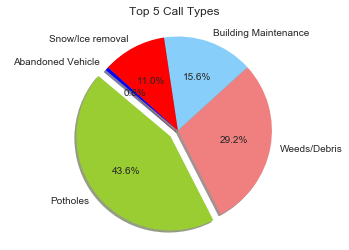

In [30]:
request_top = df['REQUEST_TYPE'].value_counts()[:5]
plt.title("Top 5 Call Types", y=1.02);
colors = ['yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'blue']
explode = (0.1, 0, 0, 0, 0)
plt.pie(request_top, explode=explode,
        labels=request_top.index,
        colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show();


In [31]:
df.groupby("NEIGHBORHOOD")["REQUEST_ID"].count()

NEIGHBORHOOD
Allegheny Center        156
Allegheny West          135
Allentown              1728
Arlington              1323
Arlington Heights        37
                       ... 
Upper Lawrenceville     966
West End                408
West Oakland            701
Westwood                687
Windgap                 539
Name: REQUEST_ID, Length: 91, dtype: int64

In [32]:
df.groupby(["NEIGHBORHOOD", "REQUEST_TYPE"]).count().max(level=0)

,REQUEST_ID,CREATED_ON,REQUEST_ORIGIN,STATUS,DEPARTMENT,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
NEIGHBORHOOD,,,,,,,,,,,,,,,
Allegheny Center,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
Allegheny West,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
Allentown,671,671,671,671,671,671,671,671,671,671,671,671,671,671,671
Arlington,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530
Arlington Heights,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474
West End,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
West Oakland,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276


In [33]:
#df['NEIGHBORHOOD'].value_counts()

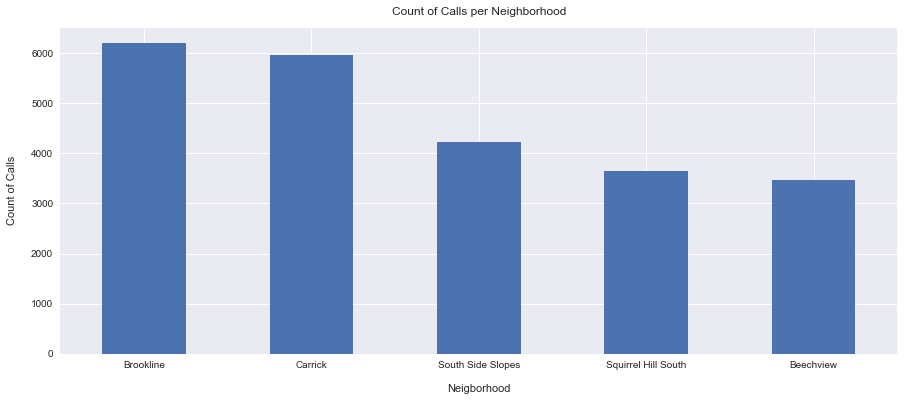

In [34]:
df['NEIGHBORHOOD'].value_counts()[:5].plot(kind='bar', figsize=(15, 6), rot=0)
plt.xlabel("Neigborhood", labelpad=14)
plt.ylabel("Count of Calls", labelpad=14)
plt.title("Count of Calls per Neighborhood", y=1.02);


Text(0.5, 1.02, 'TOP REQUEST BY NEIGHBORHOOD')

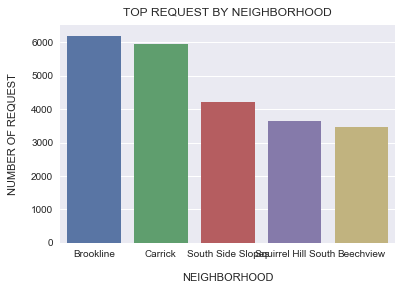

In [35]:
neighbor_top = df['NEIGHBORHOOD'].value_counts()[:5]
neighbor_top_df = pd.DataFrame({"neighborhood":neighbor_top.index,"request":neighbor_top})
sns.barplot(x="neighborhood", y="request", data=neighbor_top_df)
plt.xlabel("NEIGHBORHOOD", labelpad=14)
plt.ylabel("NUMBER OF REQUEST", labelpad=14)
plt.title("TOP REQUEST BY NEIGHBORHOOD", y=1.02)

KeyError: 'REQUEST_TYPE'

NameError: name 'tmp2' is not defined

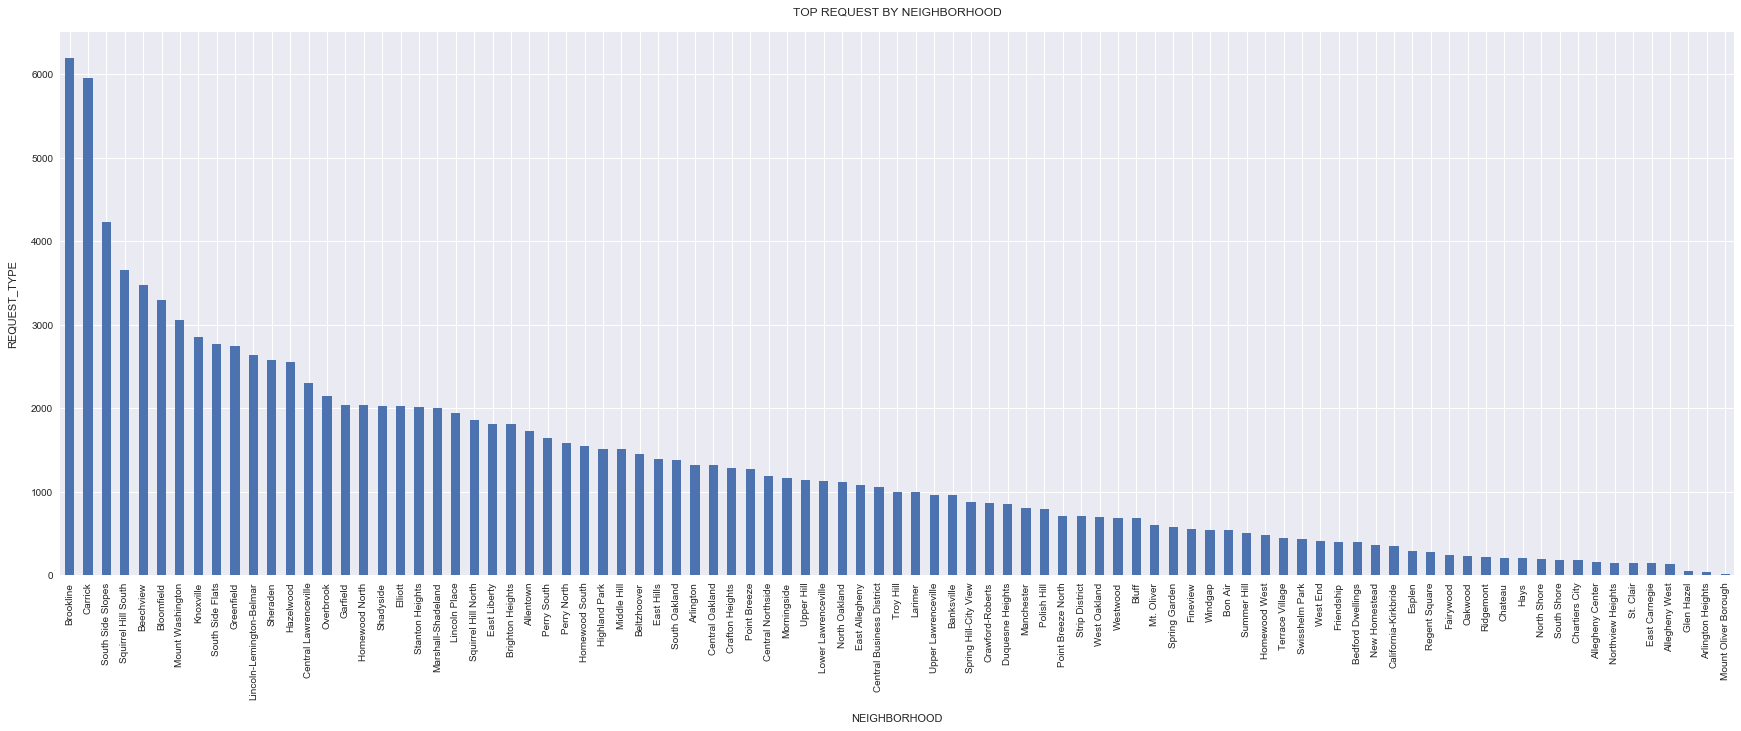

In [18]:
modDf['NEIGHBORHOOD'].value_counts().plot(kind='bar', figsize=(30, 10))
plt.xlabel("NEIGHBORHOOD", labelpad=14)
plt.ylabel("REQUEST_TYPE", labelpad=14)
plt.title("TOP REQUEST BY NEIGHBORHOOD", y=1.02);
# Dataset:
modDf=pd.DataFrame({'x': np.random.normal(10, 1.2, 20000), 'y': np.random.normal(10, 1.2, 20000), 'group': np.repeat('A',20000) })
REQUEST_TYPE=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
CREATED_ON=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
modDf=modDf.append(REQUEST_TYPE).append(tmp2)
# Plot with small marker size
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('NEIGHBORHOOD')
plt.ylabel('REQUEST_TYPE')
plt.title('Overplotting? Try to reduce the dot size', loc='left')